In [1]:
import sys
sys.path.append('C:/Users/320060820/experiments/')
import fxp_quantize
import model_data
from algorithms import fixed_bitwidth
from model_gen import inception_cnn
from algorithms.optimized_search import OptimizedSearch

import keras
import tensorflow as tf
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import pickle

# to restart layer numbering
from keras import backend as K
K.clear_session()

Using TensorFlow backend.


In [2]:
input_shape = (96, 96, 1)
num_outputs = 10 # number of classes
path_trained_weights = 'C:/Users/320060820/experiments/test_models/mnist_df/v3_batchnorm_w.h5'
name = 'mnist_df'

from test_models.mnist_df import data
_, test_data = data.get_data()

model_arch = inception_cnn.InceptionCNN(input_shape, num_outputs, dropout=False, 
                                        pool_layer_type='average', path_trained_weights=path_trained_weights)
model_obj = model_data.Model(name, test_data, model=model_arch.get_float_model())
float_model_acc = model_obj.evaluate_accuracy()[1]

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
float_model_acc

0.9746

### Weights

In [3]:
opt_params = {'conv2d_1': (7, 8),
 'conv2d_5': (6, 6),
 'conv2d_3': (6, 6),
 'conv2d_6': (4, 5),
 'conv2d_2': (5, 5),
 'conv2d_4': (4, 5),
 'conv2d_7': (5, 6),
 'conv2d_8': (5, 5),
 'conv2d_12': (5, 6),
 'conv2d_10': (3, 3),
 'conv2d_13': (4, 5),
 'conv2d_9': (4, 4),
 'conv2d_11': (3, 4),
 'conv2d_14': (4, 5),
 'conv2d_15': (3, 4),
 'conv2d_19': (4, 5),
 'conv2d_17': (3, 4),
 'conv2d_20': (3, 5),
 'conv2d_16': (1, 1),
 'conv2d_18': (2, 3),
 'conv2d_21': (3, 4),
 'conv2d_22': (2, 2),
 'binary': (3, 3)}

In [4]:
# weights
opts = OptimizedSearch(0.003, model_arch, name, test_data, float_model_acc)
w_scores, opt_params_weights = opts.run('weights', start_bw = 8)
opt_params_weights

{'conv2d_1': [8, 9], 'conv2d_5': [8, 8], 'conv2d_3': [8, 8], 'conv2d_6': [8, 9], 'conv2d_2': [8, 8], 'conv2d_4': [8, 9], 'conv2d_7': [8, 9], 'conv2d_8': [8, 8], 'conv2d_12': [8, 8], 'conv2d_10': [8, 8], 'conv2d_13': [8, 9], 'conv2d_9': [8, 8], 'conv2d_11': [8, 9], 'conv2d_14': [8, 9], 'conv2d_15': [8, 8], 'conv2d_19': [8, 9], 'conv2d_17': [8, 8], 'conv2d_20': [8, 9], 'conv2d_16': [8, 8], 'conv2d_18': [8, 9], 'conv2d_21': [8, 9], 'conv2d_22': [8, 8], 'binary': [8, 8]}
(7, 8) (8, 9) 0.0005130309870716765
Chosen:  (7, 8)
(6, 6) (6, 6) 0.0
Chosen:  (6, 6)
(6, 6) (6, 6) 0.0
Chosen:  (6, 6)
(4, 5) (4, 5) 0.0
Chosen:  (4, 5)
(5, 5) (6, 6) 0.0005130309870715625
Chosen:  (5, 5)
(4, 5) (5, 6) 0.00010260619741431264
Chosen:  (4, 5)
(5, 6) (5, 6) 0.0
Chosen:  (5, 6)
(5, 5) (6, 6) 0.00020521239482862485
Chosen:  (5, 5)
(4, 5) (5, 6) 0.002359942540529416
Chosen:  (5, 6)
(3, 3) (3, 3) 0.0
Chosen:  (3, 3)
(4, 5) (5, 6) 0.000615637184485989
Chosen:  (4, 5)
(3, 3) (4, 4) 0.0018469115534578532
Chosen:  (

{'conv2d_1': (7, 8),
 'conv2d_5': (6, 6),
 'conv2d_3': (6, 6),
 'conv2d_6': (4, 5),
 'conv2d_2': (5, 5),
 'conv2d_4': (4, 5),
 'conv2d_7': (5, 6),
 'conv2d_8': (5, 5),
 'conv2d_12': (5, 6),
 'conv2d_10': (3, 3),
 'conv2d_13': (4, 5),
 'conv2d_9': (4, 4),
 'conv2d_11': (3, 4),
 'conv2d_14': (4, 5),
 'conv2d_15': (3, 4),
 'conv2d_19': (4, 5),
 'conv2d_17': (3, 4),
 'conv2d_20': (3, 5),
 'conv2d_16': (1, 1),
 'conv2d_18': (2, 3),
 'conv2d_21': (3, 4),
 'conv2d_22': (2, 2),
 'binary': (3, 3)}

In [ ]:
output_path = 'C:/Users/320060820/experiments/outputs/Optimized_Search/DF MNIST/'

with open(output_path + 'scores_w_1.p', 'wb') as f:
    pickle.dump(w_scores, f, protocol=pickle.HIGHEST_PROTOCOL)

with open(output_path + 'opt_params_w_1.p', 'wb') as f:
    pickle.dump(opt_params_weights, f, protocol=pickle.HIGHEST_PROTOCOL)

Floating point model accuracy: 97.460 %
Quantized model accuracy: 92.870 %
Accuracy drop of 4.710 %


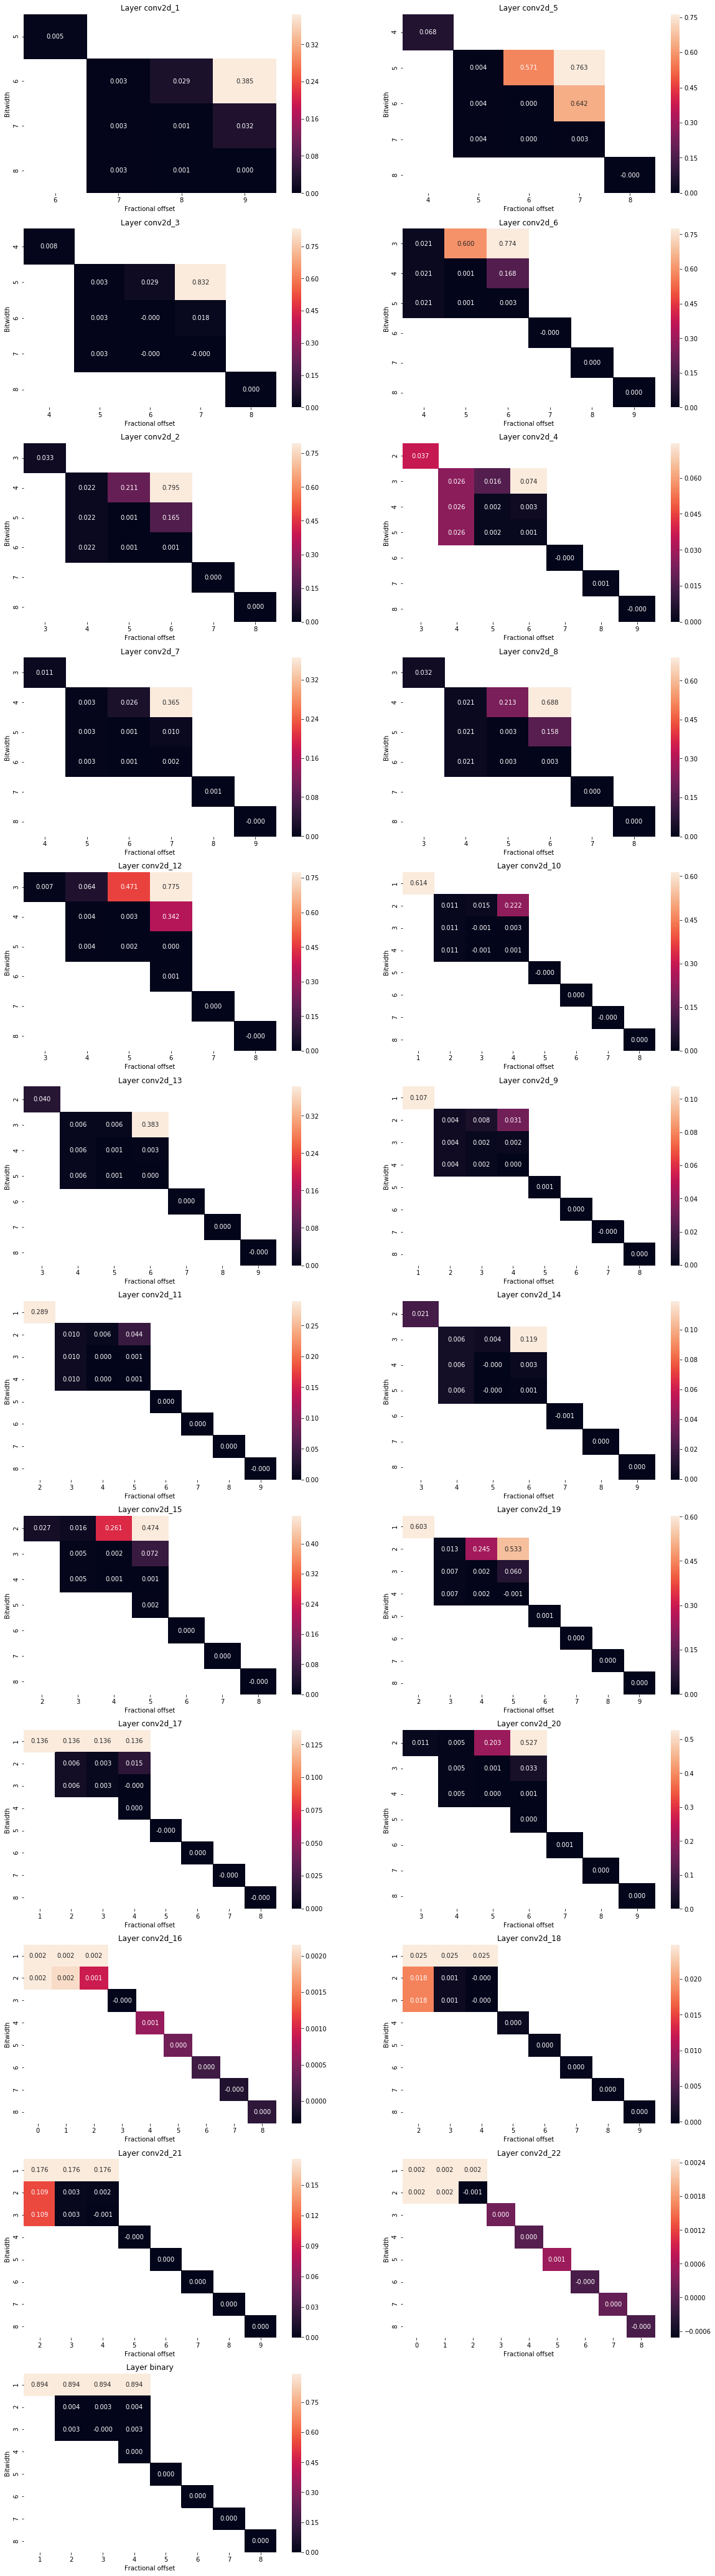

In [5]:
print(f'Floating point model accuracy: {float_model_acc * 100 :.3f} %')

model_obj = model_data.Model(name, test_data, model=model_arch.get_float_model())
model_obj = fxp_quantize.fix_weights_quantization(model_obj, opt_params_weights)
fxp_model_acc = model_obj.evaluate_accuracy()[1]
print(f'Quantized model accuracy: {fxp_model_acc * 100 :.3f} %')
print(f'Accuracy drop of {(float_model_acc - fxp_model_acc) / float_model_acc * 100 :.3f} %')

opts.plot_scores_matrix(w_scores, 12, 2, (20, 75))

In [6]:
for layer in w_scores:
    print(layer)
    print(f'Layer {layer} acc drop: {w_scores[layer][opt_params_weights[layer][0]][opt_params_weights[layer][1]]:.5f}')

conv2d_1
Layer conv2d_1 acc drop: 0.00082
conv2d_5
Layer conv2d_5 acc drop: 0.00010
conv2d_3
Layer conv2d_3 acc drop: -0.00041
conv2d_6
Layer conv2d_6 acc drop: 0.00103
conv2d_2
Layer conv2d_2 acc drop: 0.00133
conv2d_4
Layer conv2d_4 acc drop: 0.00154
conv2d_7
Layer conv2d_7 acc drop: 0.00062
conv2d_8
Layer conv2d_8 acc drop: 0.00298
conv2d_12
Layer conv2d_12 acc drop: 0.00041
conv2d_10
Layer conv2d_10 acc drop: -0.00062
conv2d_13
Layer conv2d_13 acc drop: 0.00092
conv2d_9
Layer conv2d_9 acc drop: 0.00010
conv2d_11
Layer conv2d_11 acc drop: 0.00021
conv2d_14
Layer conv2d_14 acc drop: -0.00021
conv2d_15
Layer conv2d_15 acc drop: 0.00164
conv2d_19
Layer conv2d_19 acc drop: -0.00072
conv2d_17
Layer conv2d_17 acc drop: -0.00031
conv2d_20
Layer conv2d_20 acc drop: 0.00072
conv2d_16
Layer conv2d_16 acc drop: 0.00215
conv2d_18
Layer conv2d_18 acc drop: 0.00062
conv2d_21
Layer conv2d_21 acc drop: -0.00051
conv2d_22
Layer conv2d_22 acc drop: -0.00072
binary
Layer binary acc drop: -0.00041


In [ ]:
acc_drop = []
for i in range(1, len(list(opt_params_weights.keys())) + 1):
    test_case = dict(itertools.islice(opt_params_weights.items(), i))
    print(f'Quantizing layer {list(test_case.keys())[-1]}')
    model_obj = model_data.Model(name, test_data, model=model_arch.get_float_model())
    model_obj = fxp_quantize.fix_weights_quantization(model_obj, test_case)
    fxp_model_acc = model_obj.evaluate_accuracy()[1]
    acc_drop.append((float_model_acc - fxp_model_acc) / float_model_acc)
    print(f'Quantized model accuracy: {fxp_model_acc * 100 :.3f} %')
    print(f'Accuracy drop of {acc_drop[-1] * 100 :.3f} %')

In [ ]:
x = np.arange(1, len(acc_drop) + 1, 1)
y = np.array(acc_drop) * 100
labels = list(opt_params_weights.keys())

plt.figure(figsize=(10, 7))
plt.plot(x, y, 'o-');
plt.xlabel('Layer Quantized')
plt.ylabel('Accuracy drop compared to float model (%)')
plt.xticks(x, labels, rotation='vertical');
plt.grid()

### Biases

In [8]:
# biases
opts = OptimizedSearch(0.003, model_arch, name, test_data, float_model_acc)
b_scores, opt_params_biases = opts.run('biases', start_bw = 8)
opt_params_biases

{'conv2d_1': [8, 12], 'conv2d_5': [8, 11], 'conv2d_3': [8, 11], 'conv2d_6': [8, 10], 'conv2d_2': [8, 10], 'conv2d_4': [8, 10], 'conv2d_7': [8, 11], 'conv2d_8': [8, 11], 'conv2d_12': [8, 11], 'conv2d_10': [8, 10], 'conv2d_13': [8, 10], 'conv2d_9': [8, 11], 'conv2d_11': [8, 10], 'conv2d_14': [8, 10], 'conv2d_15': [8, 11], 'conv2d_19': [8, 10], 'conv2d_17': [8, 10], 'conv2d_20': [8, 9], 'conv2d_16': [8, 10], 'conv2d_18': [8, 10], 'conv2d_21': [8, 9], 'conv2d_22': [8, 10], 'binary': [8, 11]}
(8, 12) (9, 13) 0.00041042478965736397
Chosen:  (8, 12)
(4, 7) (4, 8) 0.0015390929612149155
Chosen:  (4, 8)
(2, 5) (3, 5) 0.00010260619741431264
Chosen:  (2, 5)
(2, 4) (3, 5) 0.0018469115534578535
Chosen:  (3, 5)
(1, 3) (1, 3) 0.0
Chosen:  (1, 3)
(1, 3) (1, 3) 0.0
Chosen:  (1, 3)
(1, 4) (2, 4) 0.002154730145700791
Chosen:  (2, 4)
(2, 5) (3, 6) 0.00277036733018678
Chosen:  (3, 6)
(1, 4) (2, 4) 0.0011286681715575516
Chosen:  (1, 4)
(1, 3) (2, 4) 0.0004104247896572501
Chosen:  (1, 3)
(1, 3) (2, 4) 0.00133

{'conv2d_1': (8, 12),
 'conv2d_5': (4, 8),
 'conv2d_3': (2, 5),
 'conv2d_6': (3, 5),
 'conv2d_2': (1, 3),
 'conv2d_4': (1, 3),
 'conv2d_7': (2, 4),
 'conv2d_8': (3, 6),
 'conv2d_12': (1, 4),
 'conv2d_10': (1, 3),
 'conv2d_13': (1, 3),
 'conv2d_9': (1, 4),
 'conv2d_11': (1, 3),
 'conv2d_14': (1, 3),
 'conv2d_15': (1, 4),
 'conv2d_19': (1, 3),
 'conv2d_17': (1, 3),
 'conv2d_20': (1, 2),
 'conv2d_16': (1, 3),
 'conv2d_18': (1, 3),
 'conv2d_21': (1, 2),
 'conv2d_22': (1, 3),
 'binary': (1, 4)}

In [ ]:
output_path = 'C:/Users/320060820/experiments/outputs/Optimized_Search/DF MNIST/'

with open(output_path + 'scores_b_1.p', 'wb') as f:
    pickle.dump(b_scores, f, protocol=pickle.HIGHEST_PROTOCOL)

with open(output_path + 'opt_params_b_1.p', 'wb') as f:
    pickle.dump(opt_params_biases, f, protocol=pickle.HIGHEST_PROTOCOL)

Floating point model accuracy: 97.460 %
Quantized model accuracy: 97.300 %
Accuracy drop of 0.164 %


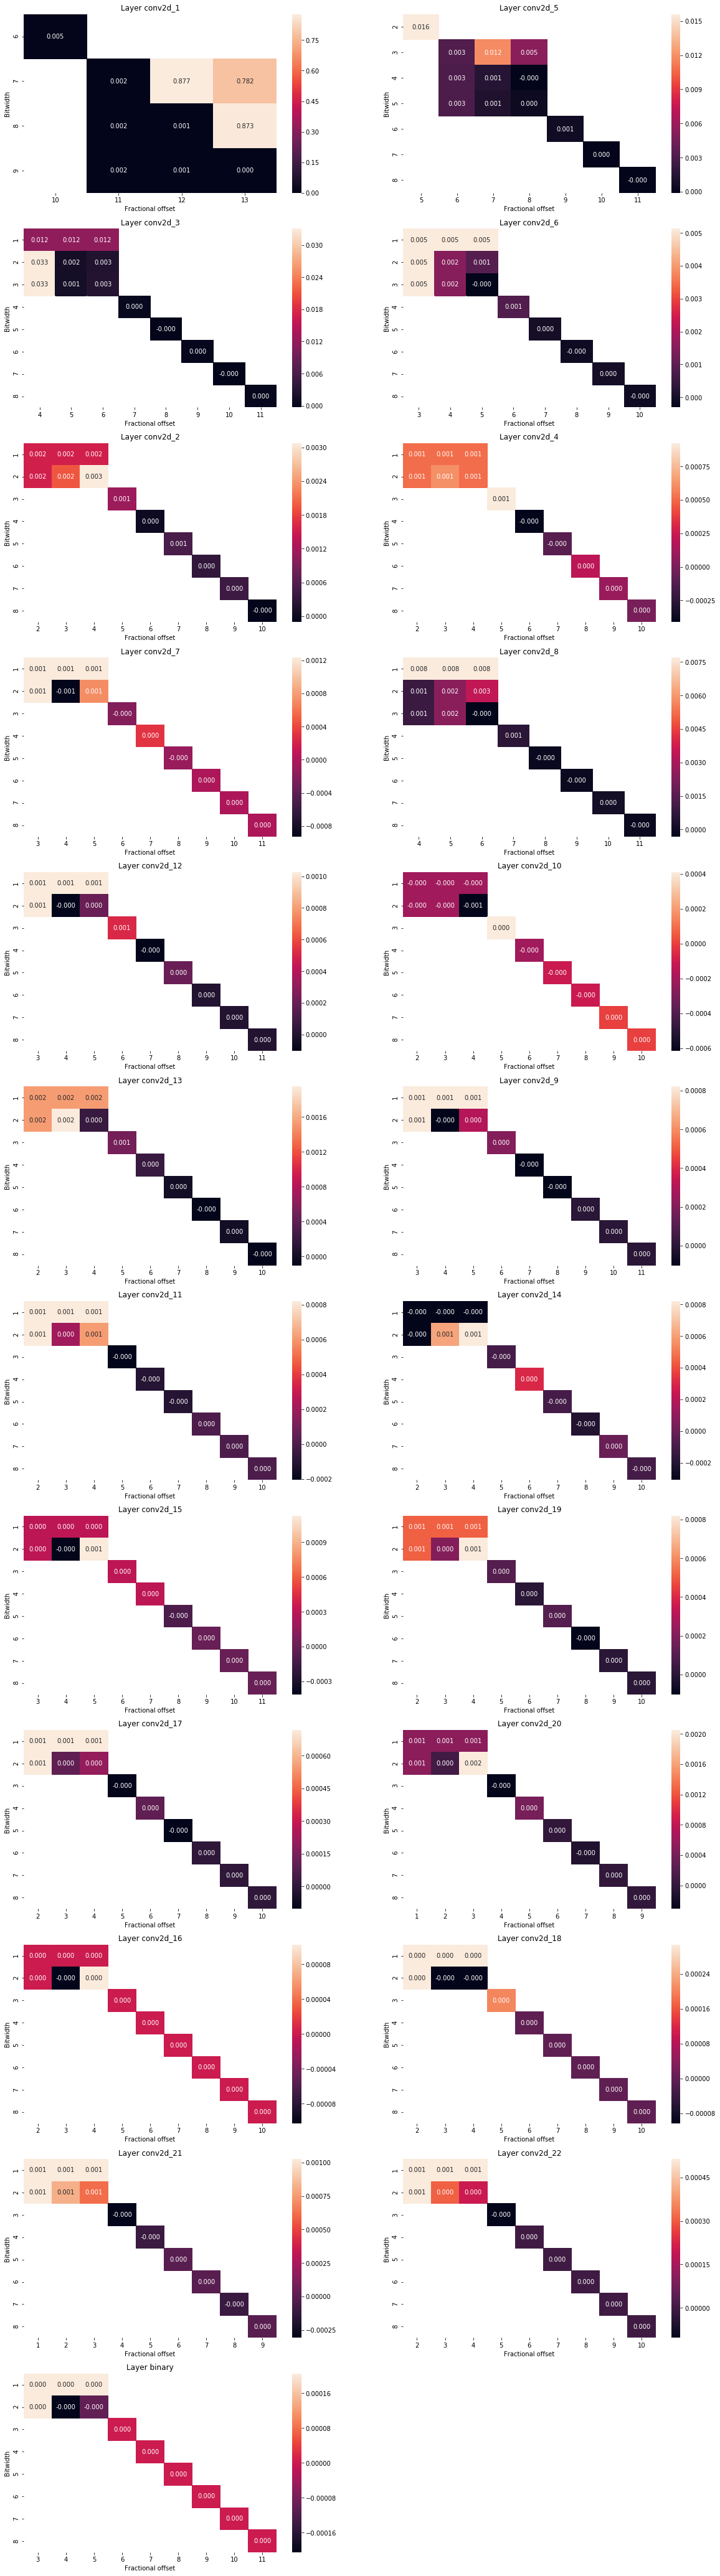

In [9]:
print(f'Floating point model accuracy: {float_model_acc * 100 :.3f} %')

model_obj = model_data.Model(name, test_data, model=model_arch.get_float_model())
model_obj = fxp_quantize.fix_biases_quantization(model_obj, opt_params_biases)
fxp_model_acc = model_obj.evaluate_accuracy()[1]
print(f'Quantized model accuracy: {fxp_model_acc * 100 :.3f} %')
print(f'Accuracy drop of {(float_model_acc - fxp_model_acc) / float_model_acc * 100 :.3f} %')

opts.plot_scores_matrix(b_scores, 12, 2, (20, 75))

### Activations

In [10]:
# activations
opts = OptimizedSearch(0.003, model_arch, name, test_data, float_model_acc)
a_scores, opt_params_act = opts.run('activations', start_bw = 8)
opt_params_act

KeyboardInterrupt: 

In [ ]:
with open(output_path + 'scores_a_1.p', 'wb') as f:
    pickle.dump(a_scores, f, protocol=pickle.HIGHEST_PROTOCOL)

with open(output_path + 'opt_params_a_1.p', 'wb') as f:
    pickle.dump(opt_params_act, f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
print(f'Floating point model accuracy: {float_model_acc * 100 :.3f} %')

model_obj = model_data.Model(name, test_data, model=model_arch.get_fxp_model(opt_params_act))
fxp_model_acc = model_obj.evaluate_accuracy()[1]
print(f'Quantized model accuracy: {fxp_model_acc * 100 :.3f} %')
print(f'Accuracy drop of {(float_model_acc - fxp_model_acc) / float_model_acc * 100 :.3f} %')

opts.plot_scores_matrix(a_scores, 12, 2, (20, 75))